# 四、K-Means

kmeans是一个经典的聚类算法，输入一组数据$D = \{x^1, x^2, ..., x^m\}$, 将其划分为K个簇 $C=\{C_1, C_2, ...,C_K\}$ 。

## 1. 算法步骤:

1.  从数据集D选择K个点作为原始K个簇的中心点$\{u_1, u_2, ... , u_K\}$ 
2.  对数据集D里的每个点进行簇划分，计算每个点和中心点的距离，将其标记为最近距离中心点所对应的类别，划分到该类别的点集合$C_k$ 中
3.  对每个簇计算新的质心$u_j = \frac{1}{|C_j|}\sum_{x\in C_j}{x}$
4.  重复步骤(2-3)直到质心不再变化或者达到最高迭代次数

## 2. python实现

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def k_means(X, k, max_iters=100):
    """this is a cluster algorithm

    Args:
        X (ndarray): shape(m, n) m samples with n dims feature
        k (interger): the classification number you hope to
        max_iters (int, optional): iteration number Defaults to 100.

    Returns:
        centers (ndarray): shape(k, n)
        C (list) : points array's list, with k items
    """
    # select k points
    m = X.shape[0]
    n = X.shape[1]
    init_k_index = np.random.choice(m, size=(k,))
    centers = X[init_k_index, :]
    for step in range(max_iters):
        # classify all points according to the distances to all centers
        X_tmp = np.expand_dims(X, axis=1)
        centers_tmp = np.expand_dims(centers, axis=0)
        dists = np.linalg.norm(X_tmp - centers_tmp, axis=2)
        clf_index = np.argmin(dists, axis=1) # array with shape(m, ), each item is the classification flag [0-(k-1)]
        C = []
        new_centers = np.empty((k, n))
        for i in range(k):
            C.append(X[clf_index==i, :])
            # recalculate the centers
            new_centers[i] = np.mean(C[i], axis=0)
        if np.all(new_centers==centers):
            print(f'Finish in advance after {step} steps!!!')
            break
        else:
            centers = new_centers.copy()

    return centers, C

### 2.1 一个实例

(1797, 64) (1797,)
Finish in advance after 22 steps!!!


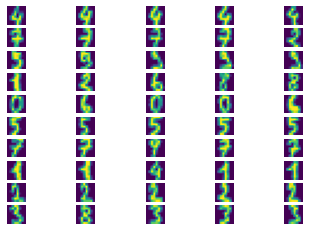

In [3]:
# load digits dataset
digits = datasets.load_digits()
digits.keys()
X = digits.data
y = digits.target
print(X.shape, y.shape)

# implement kmeans on digit dataset
centers, C = k_means(X, 10, 100)

# visualize result
for i in range(10):
    for j, point in enumerate(C[i][:5]):
        plt.subplot(10, 5, i*5+j+1)
        plt.imshow(point.reshape((8, 8)))
        plt.axis('off')